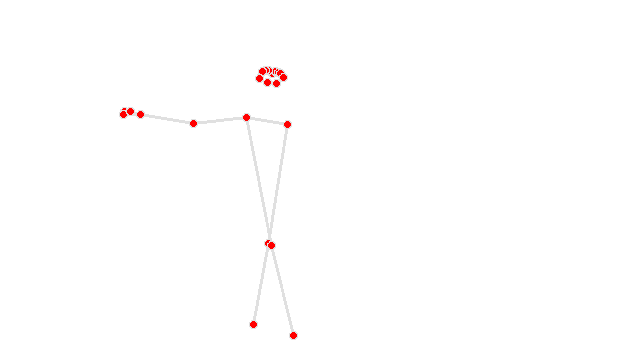

In [5]:
import cv2
import mediapipe as mp
from IPython.display import display, clear_output, Image
import numpy as np

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture("../data/yulia_sochi_free.mp4")

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create blank background parameters
blank_color = (255, 255, 255)  # White background (BGR format)



try:
    with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break

            # Create blank background
            blank_frame = np.full((height, width, 3), blank_color, dtype=np.uint8)
            

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            results = holistic.process(frame_rgb)

            if results.pose_landmarks:
                mp_drawing.draw_landmarks(blank_frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

                # Print pose landmark coordinates
                # print("Pose landmarks:")
                # for idx, landmark in enumerate(results.pose_landmarks.landmark):
                #     print(f"Landmark {idx}: (x: {landmark.x:.3f}, y: {landmark.y:.3f}, z: {landmark.z:.3f}, visibility: {landmark.visibility:.3f})")


            _, img = cv2.imencode('.png', blank_frame)

            display(Image(data=img.tobytes()))
            clear_output(wait=True)
finally:
    cap.release()

# # # 